In [92]:
'''
    Create NN without any techniques likes: L1, L2, ...
    This file is the first step to take a look with NN Classification for this homework
'''
# Import everything we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [156]:
# 1. Dataset uploading and preprocessing

data = pd.read_csv("./Resources/2024_ionosphere_data.csv", header=None)
data.iloc[:, 34] = data.iloc[:, 34].replace({'g': 1, 'b': 0})
# shuffling data
shuffled_data = data.sample(frac=1).astype(float)

# dividing data into training and test samples
train_data = shuffled_data.iloc[:int(0.8 * len(data))]
test_data = shuffled_data.iloc[int(0.8 * len(data)):]

# highlighting features and target variable
X_train = train_data.drop(train_data.columns[34], axis=1).values
y_train = train_data[train_data.columns[34]].values.reshape(-1,1)
X_test = test_data.drop(train_data.columns[34], axis=1).values
y_test = test_data[train_data.columns[34]].values.reshape(-1,1)

C:\Users\brado\AppData\Local\Temp\ipykernel_15488\3883930192.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.iloc[:, 34] = data.iloc[:, 34].replace({'g': 1, 'b': 0})


In [178]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Step 1: Load data
loaded_data = pd.read_csv("./Resources/2024_ionosphere_data.csv", header=None)

# Convert the 'g'/'b' labels to numeric (1 for 'g' and 0 for 'b')
loaded_data.iloc[:, 34] = loaded_data.iloc[:, 34].replace({
    "g": 1,
    "b": 0
}).astype(int)  # Ensure conversion to integers

# Split X and Y (Change to numpy type)
X = loaded_data.iloc[:, 0:34].values  # Features
Y = loaded_data.iloc[:, 34].astype(int).to_numpy()  # Labels

# Check the data types
print("Data type of X:", X.dtype)
print("Data type of Y:", Y.dtype)

# Split the dataset into training and testing sets using train_test_split with shuffling
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Reshape Y to be a column vector (optional if needed)
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

# Verify shapes and data types
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

print(type(Y_train))
print(type(X_train))
print(X_train.dtype)
print(Y_train.dtype)


Data type of X: float64
Data type of Y: int32
Training set shape: (280, 34) (280, 1)
Testing set shape: (71, 34) (71, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
float64
int32


C:\Users\brado\AppData\Local\Temp\ipykernel_15488\3223420353.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loaded_data.iloc[:, 34] = loaded_data.iloc[:, 34].replace({


In [147]:
# Step 1: Load data
loaded_data = pd.read_csv("./Resources/2024_ionosphere_data.csv", header=None)

# Shuffle the dataset
# shuffled_data = loaded_data.sample(frac=1).reset_index(drop=True)
shuffled_data = loaded_data

# Convert the 'g'/'b' labels to numeric (1 for 'g' and 0 for 'b')
shuffled_data.iloc[:, 34] = shuffled_data.iloc[:, 34].replace({
    "g": 1,
    "b": 0
}).astype(int)  # Ensure conversion to integers

# Split X and Y (Change to numpy type)
X = shuffled_data.iloc[:, 0:34].values  
Y = shuffled_data.iloc[:, 34].astype(int).to_numpy()

# Check the data types
print("Data type of X:", X.dtype)
print("Data type of Y:", Y.dtype) 

# Now split the dataset into training and testing sets

print(len(X))

test_size = int(0.2 * len(X))
train_size = len(X) - test_size

X_train = X[:train_size]
Y_train = Y[:train_size].reshape(-1,1)
X_test = X[train_size:]
Y_test = Y[train_size:].reshape(-1,1)

# Verify shapes and data types
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

print(type(Y_train))
print(type(X_train))
print(X_train.dtype)
print(Y_train.dtype)


Data type of X: float64
Data type of Y: int32
351
Training set shape: (281, 34) (281, 1)
Testing set shape: (70, 34) (70, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
float64
int32


C:\Users\brado\AppData\Local\Temp\ipykernel_15488\3980497203.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  shuffled_data.iloc[:, 34] = shuffled_data.iloc[:, 34].replace({


In [179]:
# Step 2: Define necessary functions - DROP OUT
def initialize_weights(layer_dims, seed=None):
    weights = {}
    biases = {}

    # Setup seed for reproducibility
    if seed is not None:
        np.random.seed(seed)

    # Loop through the layers and initialize weights and biases using Xavier Initialization
    for i in range(1, len(layer_dims)):  # Start from layer 1 to layer_dims-1
        # Xavier initialization for weights
        weights[f"W{i}"] = np.random.randn(layer_dims[i-1], layer_dims[i]).astype(np.float64) * np.sqrt(1 / layer_dims[i-1])
        biases[f"b{i}"] = np.zeros((1, layer_dims[i]), dtype=np.float64)

    return weights, biases


def binary_cross_entropy_loss(y_true, y_pred, weights, lambda_val=0.01):
    epsilon = 1e-12  # Small constant to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1.0 - epsilon)  # Clip to prevent log(0)

    # Standard binary cross-entropy loss
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    # L2 regularization term
    L2_regularization = 0
    for l in range(1, len(weights) + 1):
        L2_regularization += np.sum(np.square(weights[f"W{l}"]))

    # Add L2 regularization to the loss
    loss += (lambda_val / (2 * len(y_true))) * L2_regularization

    return loss


# Sigmoid activation function
def sigmoid(x):
    x = np.clip(x, -500, 500)  # Clip to avoid overflow errors
    return 1 / (1 + np.exp(-x))


# Sigmoid derivative (used in backpropagation)
def sigmoid_derivative(x):
    return x * (1 - x)  # Derivative of sigmoid

# Tanh activation function
def tanh(x):
    return np.tanh(x)

# Tanh derivative (used in backpropagation)
def tanh_derivative(x):
    return 1.0 - np.tanh(x) ** 2

# ReLU activation function
def relu(x):
    return np.maximum(0, x)


# ReLU derivative (for backpropagation)
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def forward_propagation(X, weights, biases, keep_prob=1.0, is_training=True):
    Xi = X  # Input layer
    Z = {}
    A = {}
    D = {}  # Dropout masks
    L = len(weights)  # Number of layers

    for index in range(1, L + 1):  # Loop over layers from 1 to L
        W = weights[f"W{index}"]
        b = biases[f"b{index}"]
        Zi = np.dot(Xi, W) + b
        Z[f"Z{index}"] = Zi

        # Apply Sigmoid activation for the last layer, Tanh/Relu for hidden layers
        if index == L:
            Ai = sigmoid(Zi)
        else:
            Ai = tanh(Zi)
            if is_training and keep_prob < 1.0:  # Apply dropout during training
                D[f"D{index}"] = np.random.rand(Ai.shape[0], Ai.shape[1]) < keep_prob  # Dropout mask
                Ai = Ai * D[f"D{index}"]  # Apply mask
                Ai = Ai / keep_prob  # Scale activations to maintain expectation

        A[f"A{index}"] = Ai
        Xi = Ai  # Output of current layer becomes input to the next layer

    return Z, A, D


def backward_propagation(
    X, Y, Z, A, D, weights, output_activation="sigmoid", hidden_activation="tanh", keep_prob=1.0
):
    m = X.shape[0]  # Number of examples
    gradients = {}
    L = len(weights)  # Number of layers with weights
    # Step 1: Initialize the derivative for the output layer
    A_last = A[f"A{L}"]  # The predicted output from the last layer

    if output_activation == "sigmoid":
        dA_last = A_last - Y  # Error at the output layer for sigmoid
    else:
        raise NotImplementedError(
            "Currently supports sigmoid for the output layer only."
        )

    dA_next = dA_last

    # Step 2: Backpropagation through layers (from L to 1)
    for l in reversed(range(1, L + 1)):
        if l == L:  # For the output layer, use dA_last directly
            dZ = dA_last
        else:
            # For hidden layers, backpropagate the error
            if hidden_activation == "relu":
                # Ensure proper reshaping of dA_next and weights for matrix multiplication
                dA_next = np.dot(dA_next, weights[f"W{l+1}"].T)
                dZ = dA_next * relu_derivative(Z[f"Z{l}"])  # Apply derivative of activation
            elif hidden_activation == "sigmoid":
                dA_next = np.dot(dA_next, weights[f"W{l+1}"].T)
                dZ = dA_next * sigmoid_derivative(A[f"A{l}"])  # Apply derivative of sigmoid
            elif hidden_activation == "tanh":
                dA_next = np.dot(dA_next, weights[f"W{l+1}"].T)
                dZ = dA_next * tanh_derivative(Z[f"Z{l}"])  # Apply derivative of Tanh activation

            if keep_prob < 1.0:  # Dropout applied
                dZ = dZ * D[f"D{l}"]  # Apply dropout mask
                dZ = dZ / keep_prob  # Scale the gradient to maintain expectation

        # Compute gradients for weights and biases
        A_prev = A[f"A{l-1}"] if l > 1 else X  # A_prev is the activation from the previous layer or input X
        gradients[f"dW{l}"] = np.dot(A_prev.T, dZ) / m  # Gradient of W
        gradients[f"db{l}"] = np.sum(dZ, axis=0, keepdims=True) / m  # Gradient of b

        # Store dA_next for the next iteration
        dA_next = dZ

    return gradients


def update_parameters(weights, biases, gradients, learning_rate, lambda_val=0.01):
    L = len(weights)  # Number of layers

    # Update each layer's weights and biases with L2 regularization
    for l in range(1, L + 1):
        # Apply L2 regularization for weight updates
        weights[f"W{l}"] -= learning_rate * (gradients[f"dW{l}"] + lambda_val * weights[f"W{l}"])
        biases[f"b{l}"] -= learning_rate * gradients[f"db{l}"]  # Biases do not use L2 regularization

    return weights, biases


def save_parameters(weights, biases, index):
    file_path = "./Parameters"
    np.save(f"{file_path}/weights_{index}.npy", weights)
    np.save(f"{file_path}/biases_{index}.npy", biases)

def train(
        X, 
        Y, 
        layer_dims, 
        epoches, 
        learning_rate, 
        train_losses, 
        X_test, 
        Y_test, 
        test_losses, 
        seed = None, 
        keep_prob=1.0, 
        lambda_val=0.01
    ):
    weights = {}
    biases = {}
    
    # Initialize weights and biases
    weights, biases = initialize_weights(layer_dims, seed)
    save_parameters(weights, biases, "initialize")
    
    # Training loop
    for i in range(epoches):
        # Forward propagation with dropout
        Z, A, D = forward_propagation(X, weights, biases, keep_prob=keep_prob, is_training=True)
        
        # Calculate training loss with L2 regularization
        train_loss = binary_cross_entropy_loss(Y, A[f"A{len(layer_dims) - 1}"], weights, lambda_val)
        train_losses.append(train_loss)
        
        # Backward propagation with dropout masks
        gradients = backward_propagation(X, Y, Z, A, D, weights, "sigmoid", "tanh", keep_prob=keep_prob)
        
        # Update parameters with L2 regularization
        weights, biases = update_parameters(weights, biases, gradients, learning_rate, lambda_val)
        
        # Test set forward propagation (without dropout)
        _, A_test, _ = forward_propagation(X_test, weights, biases, keep_prob=1.0, is_training=False)
        
        # Calculate test loss with L2 regularization
        test_loss = binary_cross_entropy_loss(Y_test, A_test[f"A{len(layer_dims) - 1}"], weights, lambda_val)
        test_losses.append(test_loss)

        # Print epoch tracking every 500 epochs
        if i % 500 == 0:
            print(f"Epoch {i+1}/{epoches}, Train Loss: {train_loss}, Test Loss: {test_loss}")

    return weights, biases



In [148]:
# Step 2: Define necessary functions
def initialize_weights(layer_dims, seed=None):
    weights = {}
    biases = {}

    # Setup seed for reproducibility
    if seed is not None:
        np.random.seed(seed)

    # Loop through the layers and initialize weights and biases using Xavier Initialization
    for i in range(1, len(layer_dims)):  # Start from layer 1 to layer_dims-1
        # Xavier initialization for weights
        weights[f"W{i}"] = np.random.randn(layer_dims[i-1], layer_dims[i]).astype(np.float64) * np.sqrt(1 / layer_dims[i-1])
        biases[f"b{i}"] = np.zeros((1, layer_dims[i]), dtype=np.float64)

    return weights, biases


def binary_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-12  # Small constant to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1.0 - epsilon)  # Clip to prevent log(0)

    # Standard binary cross-entropy loss
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    return loss


# Sigmoid activation function
def sigmoid(x):
    x = np.clip(x, -500, 500)  # Clip to avoid overflow errors
    return 1 / (1 + np.exp(-x))


# Sigmoid derivative (used in backpropagation)
def sigmoid_derivative(x):
    return x * (1 - x)  # Derivative of sigmoid

# Tanh activation function
def tanh(x):
    return np.tanh(x)

# Tanh derivative (used in backpropagation)
def tanh_derivative(x):
    return 1.0 - np.tanh(x) ** 2

# ReLU activation function
def relu(x):
    return np.maximum(0, x)


# ReLU derivative (for backpropagation)
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def forward_propagation(X, weights, biases):
    Xi = X  # Input layer
    Z = {}
    A = {}
    L = len(
        weights
    )  # Number of layers / Just 3 weights inside --> So we need plus one for layers

    for index in range(1, L + 1):  # Loop over layers from 1 to L
        W = weights[f"W{index}"]
        b = biases[f"b{index}"]
        Zi = np.dot(Xi, W) + b
        Z[f"Z{index}"] = Zi

        # Apply Sigmoid activation for the last layer, ReLU for hidden layers
        if index == L:
            Ai = sigmoid(Zi)
        else:
            Ai = tanh(Zi)
        A[f"A{index}"] = Ai
        Xi = Ai  # Output of current layer becomes input to the next layer

    return Z, A


def backward_propagation(
    X, Y, Z, A, weights, output_activation="sigmoid", hidden_activation="tanh"
):
    m = X.shape[0]  # Number of examples
    gradients = {}
    L = len(weights)  # Number of layers with weights
    # Step 1: Initialize the derivative for the output layer
    A_last = A[f"A{L}"]  # The predicted output from the last layer

    if output_activation == "sigmoid":
        dA_last = A_last - Y  # Error at the output layer for sigmoid
    else:
        raise NotImplementedError(
            "Currently supports sigmoid for the output layer only."
        )

    dA_next = dA_last

    # Step 2: Backpropagation through layers (from L to 1)
    for l in reversed(range(1, L + 1)):
        if l == L:  # For the output layer, use dA_last directly
            dZ = dA_last
        else:
            # For hidden layers, backpropagate the error
            if hidden_activation == "relu":
                # Ensure proper reshaping of dA_next and weights for matrix multiplication
                dA_next = np.dot(dA_next, weights[f"W{l+1}"].T)
                dZ = dA_next * relu_derivative(
                    Z[f"Z{l}"]
                )  # Apply derivative of activation
            elif hidden_activation == "sigmoid":
                dA_next = np.dot(dA_next, weights[f"W{l+1}"].T)
                dZ = dA_next * sigmoid_derivative(
                    A[f"A{l}"]
                )  # Apply derivative of sigmoid
            elif hidden_activation == "tanh":  # New condition for tanh activation
                dA_next = np.dot(dA_next, weights[f"W{l+1}"].T)
                dZ = dA_next * tanh_derivative(
                    Z[f"Z{l}"]
                )  # Apply derivative of Tanh activation
            else:
                raise NotImplementedError(
                    f"Unsupported activation function: {hidden_activation}"
                )

        # Compute gradients for weights and biases
        A_prev = (
            A[f"A{l-1}"] if l > 1 else X
        )  # A_prev is the activation from the previous layer or input X
        gradients[f"dW{l}"] = np.dot(A_prev.T, dZ) / m  # Gradient of W
        gradients[f"db{l}"] = np.sum(dZ, axis=0, keepdims=True) / m  # Gradient of b

        # Store dA_next for the next iteration
        dA_next = dZ

    return gradients


def update_parameters(weights, biases, gradients, learning_rate):
    L = len(weights)  # Number of layers

    # Update each layer's weights and biases without L2 regularization
    for l in range(1, L + 1):
        weights[f"W{l}"] -= learning_rate * gradients[f"dW{l}"]
        biases[f"b{l}"] -= learning_rate * gradients[f"db{l}"]

    return weights, biases


def save_parameters(weights, biases, index):
    file_path = "./Parameters"
    np.save(f"{file_path}/weights_{index}.npy", weights)
    np.save(f"{file_path}/biases_{index}.npy", biases)

In [162]:
# Apply L2 - Step 2 Also
# Step 2: Define necessary functions
def initialize_weights(layer_dims, seed=None):
    weights = {}
    biases = {}

    # Setup seed for reproducibility
    if seed is not None:
        np.random.seed(seed)

    # Loop through the layers and initialize weights and biases using Xavier Initialization
    for i in range(1, len(layer_dims)):  # Start from layer 1 to layer_dims-1
        # Xavier initialization for weights
        weights[f"W{i}"] = np.random.randn(layer_dims[i-1], layer_dims[i]).astype(np.float64) * np.sqrt(1 / layer_dims[i-1])
        biases[f"b{i}"] = np.zeros((1, layer_dims[i]), dtype=np.float64)

    return weights, biases


def binary_cross_entropy_loss(y_true, y_pred, weights, lambda_val=0.01):
    epsilon = 1e-12  # Small constant to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1.0 - epsilon)  # Clip to prevent log(0)

    # Standard binary cross-entropy loss
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    # L2 regularization term
    L2_regularization = 0
    for l in range(1, len(weights) + 1):
        L2_regularization += np.sum(np.square(weights[f"W{l}"]))

    # Add L2 regularization to the loss
    loss += (lambda_val / (2 * len(y_true))) * L2_regularization

    return loss



# Sigmoid activation function
def sigmoid(x):
    x = np.clip(x, -500, 500)  # Clip to avoid overflow errors
    return 1 / (1 + np.exp(-x))


# Sigmoid derivative (used in backpropagation)
def sigmoid_derivative(x):
    return x * (1 - x)  # Derivative of sigmoid

# Tanh activation function
def tanh(x):
    return np.tanh(x)

# Tanh derivative (used in backpropagation)
def tanh_derivative(x):
    return 1.0 - np.tanh(x) ** 2

# ReLU activation function
def relu(x):
    return np.maximum(0, x)


# ReLU derivative (for backpropagation)
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def forward_propagation(X, weights, biases):
    Xi = X  # Input layer
    Z = {}
    A = {}
    L = len(
        weights
    )  # Number of layers / Just 3 weights inside --> So we need plus one for layers

    for index in range(1, L + 1):  # Loop over layers from 1 to L
        W = weights[f"W{index}"]
        b = biases[f"b{index}"]
        Zi = np.dot(Xi, W) + b
        Z[f"Z{index}"] = Zi

        # Apply Sigmoid activation for the last layer, ReLU for hidden layers
        if index == L:
            Ai = sigmoid(Zi)
        else:
            Ai = tanh(Zi)
        A[f"A{index}"] = Ai
        Xi = Ai  # Output of current layer becomes input to the next layer

    return Z, A


def backward_propagation(
    X, Y, Z, A, weights, output_activation="sigmoid", hidden_activation="tanh"
):
    m = X.shape[0]  # Number of examples
    gradients = {}
    L = len(weights)  # Number of layers with weights
    # Step 1: Initialize the derivative for the output layer
    A_last = A[f"A{L}"]  # The predicted output from the last layer

    if output_activation == "sigmoid":
        dA_last = A_last - Y  # Error at the output layer for sigmoid
    else:
        raise NotImplementedError(
            "Currently supports sigmoid for the output layer only."
        )

    dA_next = dA_last

    # Step 2: Backpropagation through layers (from L to 1)
    for l in reversed(range(1, L + 1)):
        if l == L:  # For the output layer, use dA_last directly
            dZ = dA_last
        else:
            # For hidden layers, backpropagate the error
            if hidden_activation == "relu":
                # Ensure proper reshaping of dA_next and weights for matrix multiplication
                dA_next = np.dot(dA_next, weights[f"W{l+1}"].T)
                dZ = dA_next * relu_derivative(
                    Z[f"Z{l}"]
                )  # Apply derivative of activation
            elif hidden_activation == "sigmoid":
                dA_next = np.dot(dA_next, weights[f"W{l+1}"].T)
                dZ = dA_next * sigmoid_derivative(
                    A[f"A{l}"]
                )  # Apply derivative of sigmoid
            elif hidden_activation == "tanh":  # New condition for tanh activation
                dA_next = np.dot(dA_next, weights[f"W{l+1}"].T)
                dZ = dA_next * tanh_derivative(
                    Z[f"Z{l}"]
                )  # Apply derivative of Tanh activation
            else:
                raise NotImplementedError(
                    f"Unsupported activation function: {hidden_activation}"
                )

        # Compute gradients for weights and biases
        A_prev = (
            A[f"A{l-1}"] if l > 1 else X
        )  # A_prev is the activation from the previous layer or input X
        gradients[f"dW{l}"] = np.dot(A_prev.T, dZ) / m  # Gradient of W
        gradients[f"db{l}"] = np.sum(dZ, axis=0, keepdims=True) / m  # Gradient of b

        # Store dA_next for the next iteration
        dA_next = dZ

    return gradients


def update_parameters(weights, biases, gradients, learning_rate, lambda_val=0.01):
    L = len(weights)  # Number of layers

    # Update each layer's weights and biases with L2 regularization
    for l in range(1, L + 1):
        # Apply L2 regularization for weight updates
        weights[f"W{l}"] -= learning_rate * (gradients[f"dW{l}"] + lambda_val * weights[f"W{l}"])
        biases[f"b{l}"] -= learning_rate * gradients[f"db{l}"]  # Biases do not use L2 regularization

    return weights, biases



def save_parameters(weights, biases, index):
    file_path = "./Parameters"
    np.save(f"{file_path}/weights_{index}.npy", weights)
    np.save(f"{file_path}/biases_{index}.npy", biases)

def train(
        X, 
        Y, 
        layer_dims, 
        epoches, 
        learning_rate, 
        train_losses, 
        X_test, 
        Y_test, 
        test_losses, 
        seed = None
    ):
    weights = {}
    biases = {}
    # Initialize weights and biases
    weights, biases = initialize_weights(layer_dims, seed)
    save_parameters(weights, biases, "initialize")
    # Training loop
    for i in range(epoches):
        # Forward propagation
        Z, A = forward_propagation(X, weights, biases)
        # Calculate training loss
        train_loss = binary_cross_entropy_loss(Y, A[f"A{len(layer_dims) - 1}"], weights, lambda_val=0.01)
        train_losses.append(train_loss)
        
        # Backward propagation
        gradients = backward_propagation(X, Y, Z, A, weights, "sigmoid", "tanh")
        weights, biases = update_parameters(weights, biases, gradients, learning_rate, lambda_val=0.01)
        
        # Test set forward propagation
        _, A_test = forward_propagation(X_test, weights, biases)
        
        # Calculate test loss
        test_loss = binary_cross_entropy_loss(Y_test, A_test[f"A{len(layer_dims) - 1}"], weights, lambda_val=0.01)
        test_losses.append(test_loss)

        # Print epoch tracking every 500 epochs
        if i % 500 == 0:
            print(f"Epoch {i+1}/{epoches}, Train Loss: {train_loss}, Test Loss: {test_loss}")

    return weights, biases


In [152]:
# Example usage of initialize function
'''
    You can run multiple times to see the values of weights and biases do not change.
    We can use those values for a lot of test after we change our parameters.
'''
layer_dims = [64, 128, 64, 32, 1]  # Example for a network with 3 hidden layers
weights, biases = initialize_weights(layer_dims) # Fixed the values of weights and biases

# Output the initialized weights and biases (you can print to check them)
print("Weights:", weights)
print("Biases:", biases)

Weights: {'W1': array([[-0.00972875, -0.17309556, -0.0336952 , ...,  0.12465341,
         0.10040263,  0.02691714],
       [ 0.20523374, -0.21113598, -0.02604728, ...,  0.03478585,
        -0.08933267, -0.07251928],
       [-0.05739922, -0.13437617,  0.1674981 , ..., -0.29938782,
         0.00126679,  0.17190021],
       ...,
       [ 0.13412945, -0.00843141,  0.05298247, ..., -0.06199949,
        -0.09183536, -0.07571608],
       [ 0.03908794, -0.02584269, -0.18637839, ..., -0.18849223,
        -0.08288773,  0.11404734],
       [-0.15359538, -0.10271168, -0.05880316, ...,  0.04639549,
        -0.13845335, -0.08131848]]), 'W2': array([[-1.03040127e-01, -3.11088018e-02, -3.00803058e-02, ...,
         2.19821074e-02,  1.40171784e-01,  9.42759799e-02],
       [-2.35686613e-01,  7.95025850e-02, -5.13521779e-02, ...,
        -1.12885160e-03,  3.45762573e-02, -1.02058302e-02],
       [ 6.01099955e-03,  1.14135745e-01,  9.34381278e-02, ...,
        -8.16106878e-02, -4.84126540e-05,  5.4038451

In [194]:
index_run = 1
layer_dims = [34, 64, 16, 1]
epoches = 50000  # Reduced from 50000
train_losses = []
test_losses = []
learning_rate = 0.0008
lambda_val = 0.02  # Add L2 regularization strength
keep_prob = 0.4    # Apply dropout to hidden layers

weights, biases = train(
    X_train, 
    Y_train, 
    layer_dims, 
    epoches, 
    learning_rate, 
    train_losses, 
    X_test, 
    Y_test, 
    test_losses,
    seed=42,  # For reproducibility
    keep_prob=keep_prob,
    lambda_val=lambda_val
)
save_parameters(weights, biases, index_run)


Epoch 1/50000, Train Loss: 0.8623241010210342, Test Loss: 0.8199198431601161
Epoch 501/50000, Train Loss: 0.6618187067599051, Test Loss: 0.6335906562350739
Epoch 1001/50000, Train Loss: 0.6455218409796539, Test Loss: 0.5972552287124687
Epoch 1501/50000, Train Loss: 0.6153327031893666, Test Loss: 0.583988285067378
Epoch 2001/50000, Train Loss: 0.5674552251907377, Test Loss: 0.575061116098542
Epoch 2501/50000, Train Loss: 0.5793273111704106, Test Loss: 0.5672026674705563
Epoch 3001/50000, Train Loss: 0.5279722611463713, Test Loss: 0.5597878171562165
Epoch 3501/50000, Train Loss: 0.556608694198882, Test Loss: 0.5525802750307969
Epoch 4001/50000, Train Loss: 0.5546343431595656, Test Loss: 0.5456202625289899
Epoch 4501/50000, Train Loss: 0.5215946084330599, Test Loss: 0.5386900157254118
Epoch 5001/50000, Train Loss: 0.5055973105411223, Test Loss: 0.5319931287548129
Epoch 5501/50000, Train Loss: 0.5165534756147631, Test Loss: 0.5254053045296676
Epoch 6001/50000, Train Loss: 0.511261110667062

KeyboardInterrupt: 

Good or Bad - Binary Cross Entropy Loss on Train Set: 2.468370104127634
Good or Bad - Binary Cross Entropy Loss on Test Set: 3.5077052124090065
RMSE on Train Set: 0.25583247913870905
RMSE on Test Set: 0.33963593906299816


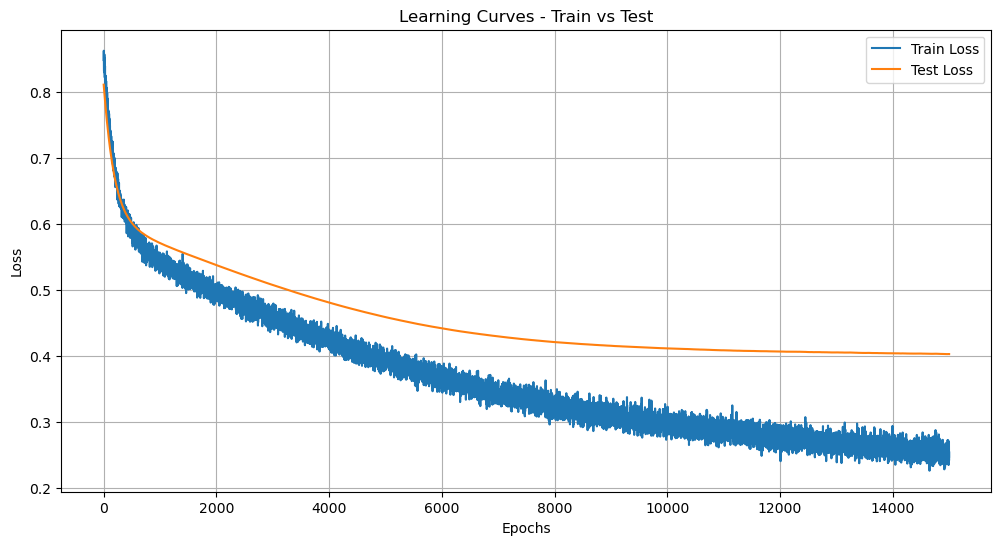

In [190]:
# Root Mean Squared Error (RMSE) function
def rmse_loss(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Step 5: Predict
_, A_test, _ = forward_propagation(X_test, weights, biases)
_, A_train, _ = forward_propagation(X_train, weights, biases)

Y_pred_test = A_test[f"A{len(layer_dims)-1}"]
Y_pred_train = A_train[f"A{len(layer_dims)-1}"]

# Binarize predictions for classification
Y_pred_train_bin = np.where(Y_pred_train < 0.5, 0, 1)
Y_pred_test_bin = np.where(Y_pred_test < 0.5, 0, 1)

# Evaluate the performance for TRAIN using Binary Cross-Entropy Loss on the Training Set
bce_loss_train = binary_cross_entropy_loss(Y_train, Y_pred_train_bin, weights)  # Binary predictions for BCE
bce_loss_test = binary_cross_entropy_loss(Y_test, Y_pred_test_bin, weights)  # Binary predictions for BCE

# Calculate RMSE for Train and Test
rmse_train = rmse_loss(Y_train, Y_pred_train)  # RMSE for predicted probabilities
rmse_test = rmse_loss(Y_test, Y_pred_test)  # RMSE for predicted probabilities

# Print the results
print(f"Good or Bad - Binary Cross Entropy Loss on Train Set: {bce_loss_train}")
print(f"Good or Bad - Binary Cross Entropy Loss on Test Set: {bce_loss_test}")
print(f"RMSE on Train Set: {rmse_train}")
print(f"RMSE on Test Set: {rmse_test}")

# Visualize the learning curve (TRAIN DATA and TEST DATA combined)
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.title("Learning Curves - Train vs Test")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()  # Show legend to differentiate between train and test curves
plt.grid(True)
plt.show()
